# "PyTorch torch.lerp Exploration"
> "Reviewing torch.lerp and its uses"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kevin Bird
- categories: [python, technical, exploration]

## Introduction

`torch.lerp` stands for <i><b>l</b>inear int<b>erp</b>olation</i> is a handy function that combines two tensors using a provided weight.  Let's explore how it can be used!

In [44]:
import torch

Let's start off with something easy.  We have two items and we want to combine them by taking 75% of item1 and 25% of item2.  Mathematically, this could be represented as $output = 0.75*item1+0.25*item2$.  A more general form of this can be represented as $output = pct*item1+(1-pct)*item2$.  This is a very common piece of code in machine learning papers.  That's why pytorch has the handy `torch.lerp` function!

In [111]:
item1 = torch.tensor(2.)
item2 = torch.tensor(6.)
weight = 1/4 # This means that we will use 2/3 of item2 and 1/3 of item1

In [112]:
output1 = (1-weight)*item1+(weight)*item2

In [113]:
output2 = torch.lerp(item1, item2, weight)

In [114]:
output1

tensor(3.)

In [115]:
output2

tensor(3.)

Here is an example in the [mixup paper](https://arxiv.org/pdf/1710.09412.pdf) of lerp being used in practice: 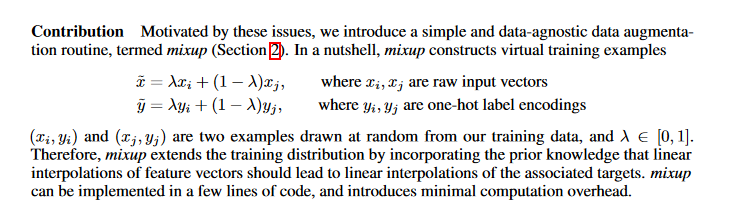

In [116]:
import matplotlib.pyplot as plt

In [132]:
np_april = plt.imread('notebook_images/pets/april.jpg')
april = torch.from_numpy(np_april)

In [162]:
april_smaller = april[600:600+1224,1100:1100+1124,:]/255.

In [179]:
x_i = april_smaller #simulated image #1
x_j = torch.rand_like(x_i) #simulated image #2
lam=0.1 # Let's set lam to 0.5 which will blend equal parts of xi and xj.

Now, let's blend these two 'images'

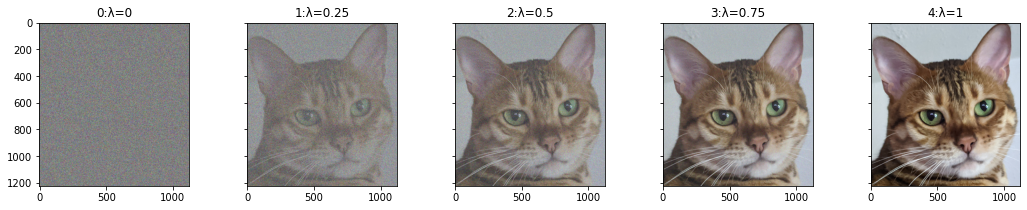

In [194]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(18,3))
for i,lam in enumerate([0, 0.25, 0.5, 0.75, 1]):
    x_hat = torch.lerp(x_j,x_i,lam)
    axs[i].set_title(f'{i}:λ={lam}')
    axs[i].imshow(x_hat)

In [195]:
from fastcore.all import test_close, test_eq

In [197]:
x_hat = torch.lerp(x_j,x_i,weight=0.5)

In [198]:
test_close((x_j + x_i)/2, x_hat, eps=1e-6)

As we expected, these two are equal (within a small amount of error due to float math)

Another area that linear interpolation is used quite often is with exponentially weighted decay.  This allows us to not entirely discard previous weight results while only keeping track of the most recent value.  

Here is what exponential weighted decay looks like in the [Adam Optimizer](https://arxiv.org/abs/1412.6980) formula: 
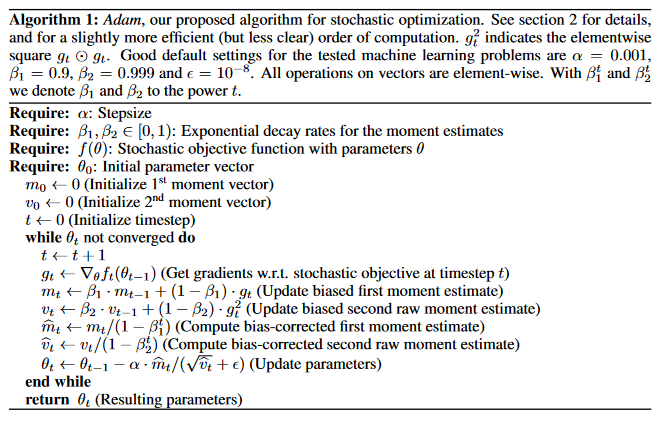

This algorithm actually contains two linear interpolations:  
$m_t = \beta_1*m_{t-1}+(1-\beta_1)*g_t$  
$v_t = \beta_2*v_{t-1}+(1-\beta_2)*g_t^2$  

and here is what they look like in code:

In [199]:
m_tm1=torch.tensor(0.)
v_tm1=torch.tensor(0.)
g_t = torch.tensor(0.5)
beta1=torch.tensor(0.99)
beta2=torch.tensor(0.999)

In [200]:
m_t = torch.lerp(m_tm1, g_t, beta1)
v_t = torch.lerp(v_tm1, g_t**2, beta2)

In [201]:
m_t

tensor(0.4950)

In [202]:
v_t

tensor(0.2498)

Hope this was helpful and gave a better understanding of what torch.lerp is and where it is used.  If you have any suggestions or questions, please feel free to reach out and I would be happy to address them!